In [1]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='BasicMotions'#'GunPoint'

# Load Data

In [3]:
#TODO include OneHot Encoding Options
#train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='feat',cwd='/media/jacqueline/Data/UCRArchive_2018/')


In [4]:
X_train,y_train, X_test, y_test=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])
train_y = y_train
test_y=y_test


In [5]:
print(test_y.shape)

(40,)


In [6]:
#enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
#pickle.dump(enc1,open(f'./ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))
enc1=pickle.load(open(f'../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

# Model Training

In [7]:
n_pred_classes =train_y.shape[1]
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)
model = ResNetBaseline(in_channels=6, num_pred_classes=n_pred_classes)
fit(model,train_loader,test_loader)
if dataset in os.listdir('../ClassificationModels/models/'):
    print('Folder exists')
else: 
    os.mkdir(f'../ClassificationModels/models/{dataset}')
torch.save(model.state_dict(), f'../ClassificationModels/models/{dataset}/ResNet')
model.load_state_dict(torch.load(f'../ClassificationModels/models/{dataset}/ResNet'))
model.eval()

test_preds, ground_truth = get_all_preds(model, test_loader)
ground_truth=np.argmax(ground_truth,axis=1)

sns.set(rc={'figure.figsize':(5,4)})
heatmap=confusion_matrix(ground_truth, test_preds)
sns.heatmap(heatmap, annot=True)
plt.savefig(f'../ClassificationModels/models/{dataset}/ResNet_confusion_matrix.png')
plt.close()
acc= accuracy_score(ground_truth, test_preds)
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'../ClassificationModels/models/{dataset}/classification_report.csv', index = False)

Epoch: 1, Train loss: 1.065, Val loss: 1.203
Epoch: 2, Train loss: 1.216, Val loss: 1.033
Epoch: 3, Train loss: 0.987, Val loss: 0.97
Epoch: 4, Train loss: 0.824, Val loss: 0.708
Epoch: 5, Train loss: 0.574, Val loss: 0.472
Epoch: 6, Train loss: 0.583, Val loss: 0.472
Epoch: 7, Train loss: 0.721, Val loss: 0.497
Epoch: 8, Train loss: 0.479, Val loss: 0.598
Epoch: 9, Train loss: 0.275, Val loss: 0.316
Epoch: 10, Train loss: 0.166, Val loss: 0.142
Epoch: 11, Train loss: 0.093, Val loss: 0.153
Epoch: 12, Train loss: 0.093, Val loss: 0.063
Epoch: 13, Train loss: 0.054, Val loss: 0.047
Epoch: 14, Train loss: 0.02, Val loss: 0.04
Epoch: 15, Train loss: 0.005, Val loss: 0.103
Epoch: 16, Train loss: 0.02, Val loss: 0.111
Epoch: 17, Train loss: 0.004, Val loss: 0.19
Epoch: 18, Train loss: 0.015, Val loss: 0.102
Epoch: 19, Train loss: 0.001, Val loss: 0.092
Epoch: 20, Train loss: 0.001, Val loss: 0.081
Epoch: 21, Train loss: 0.001, Val loss: 0.069
Epoch: 22, Train loss: 0.005, Val loss: 0.048
Ep

# Explanation Algo

In [8]:
from TSInterpret.InterpretabilityModels.IsmailEtAl.SaliencyMethods_PT import Saliency_PT
int_mod=Saliency_PT(model, train_x.shape[-1],train_x.shape[-2], method='GS',mode='feat')

In [9]:
item = np.array([test_x[0,:,:]])
label = int(np.argmax(test_y[0]))


In [10]:
exp=int_mod.explain(item,labels=label,TSR = True)

feature mask (100, 6)
time mask (100, 6)
TSR is set true
sequence length 100
inpu size 6
Else
(1, 6, 100)
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.Size([1, 6, 100])
torch.

feat
NOT Time mode


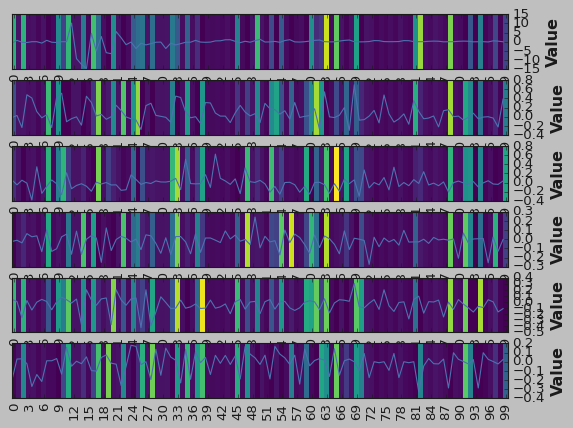

In [11]:
int_mod.plot(np.array([test_x[0,:,:]]),exp)

feat
NOT Time mode


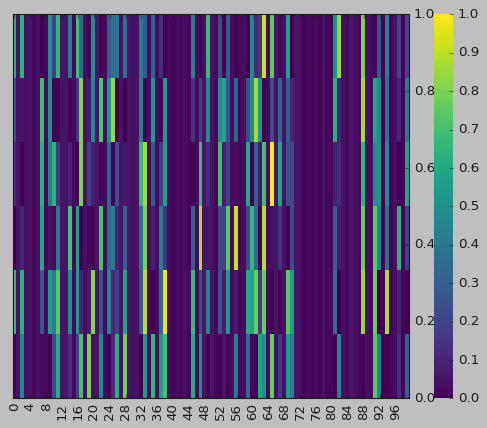

In [12]:
int_mod.plot(np.array([test_x[0,:,:]]),exp, heatmap = True)